# Quantum Circuit Simulation using Qiskit

This notebook demonstrates the construction and simulation of a quantum circuit
using Qiskit AerSimulator and measurement analysis.


In [1]:
import qiskit


In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Create a 1-qubit 1-bit circuit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate (makes a superposition)
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Use Aer simulator backend
simulator = AerSimulator()

# Transpile circuit for simulator
compiled_circuit = transpile(qc, simulator)

# Run the simulation
result = simulator.run(compiled_circuit, shots=1000).result()

# Print measurement probabilities
print(result.get_counts())


{'0': 530, '1': 470}


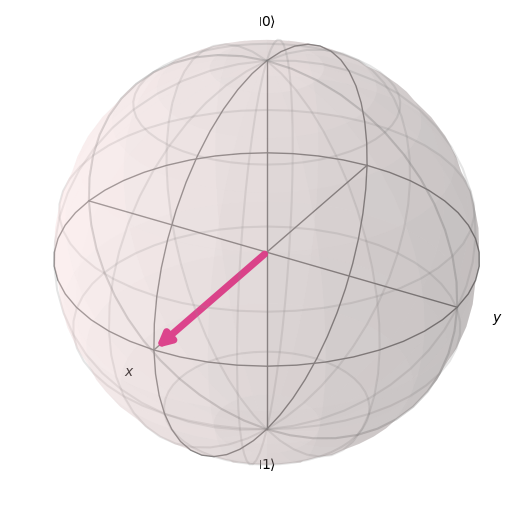

In [3]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_vector
import numpy as np

# Create 1-qubit circuit
qc = QuantumCircuit(1)

# Create superposition
qc.h(0)

# Extract quantum state
state = Statevector.from_instruction(qc)
bloch = state.data

# Calculate Bloch sphere coordinates
x = 2 * np.real(np.conj(bloch[0]) * bloch[1])
y = 2 * np.imag(np.conj(bloch[0]) * bloch[1])
z = np.abs(bloch[0])**2 - np.abs(bloch[1])**2

# Plot Bloch sphere
plot_bloch_vector([x, y, z])


In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

# Create a 1-qubit 1-bit circuit
qc = QuantumCircuit(1, 1)

# Apply a Hadamard gate (creates a superposition)
qc.h(0)

# Measure the qubit to classical bit
qc.measure(0, 0)

# Choose Aer Simulator
simulator = AerSimulator()

# Transpile the circuit for simulator
compiled_circuit = simulator.run(qc, shots=1000).result()

# Run the simulation
result = simulator.run(qc, shots=1000).result()

print(result.get_counts())


{'1': 486, '0': 514}


In [5]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Create 2 qubit, 2 classical bit circuit
qc = QuantumCircuit(2, 2)

# Step 1: Put qubit 0 in superposition
qc.h(0)

# Step 2: Entangle qubit 1 with qubit 0 using CNOT
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1]) #TODO

# Run the circuit
simulator = AerSimulator()
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1000).result()

print(result.get_counts())


{'00': 534, '11': 466}


In [6]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
N = 50  
use_noise = True 
noise_strength = 0.02
noise_model = NoiseModel()
if use_noise:
    noise_model.add_all_qubit_quantum_error(depolarizing_error(noise_strength, 1), ['measure'])
    noise_model.add_all_qubit_quantum_error(depolarizing_error(noise_strength, 2), ['cx'])
alice_bases = np.random.randint(0, 2, N)
bob_bases = np.random.randint(0, 2, N)
alice_results = []
bob_results = []
for i in range(N):
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    if alice_bases[i] == 1:
        qc.h(0)
    if bob_bases[i] == 1:
        qc.h(1)
    qc.measure([0, 1], [0, 1])
    sim = AerSimulator(noise_model=noise_model if use_noise else None)
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1).result()
    outcome = list(result.get_counts().keys())[0]
    alice_results.append(int(outcome[-1]))
    bob_results.append(int(outcome[-2])) 
matched = alice_bases == bob_bases
shared_key_alice = np.array(alice_results)[matched]
shared_key_bob = np.array(bob_results)[matched]
qber = np.sum(shared_key_alice != shared_key_bob) / len(shared_key_alice)
print("\n--- E91 Simulation Summary ---")
print("Alice Bases:   ", alice_bases)
print("Bob Bases:     ", bob_bases)
print("Alice Results: ", alice_results)
print("Bob Results:   ", bob_results)
print("\nFinal Shared Key (Alice):", shared_key_alice)
print("Final Shared Key (Bob):  ", shared_key_bob)
print("\nQBER:", round(qber * 100, 2), "%")
if qber < 11:
    print("\nStatus: Key is secure — no eavesdropper detected.\n")
else:
    print("\nStatus: Possible eavesdropper detected — key rejected.\n")



--- E91 Simulation Summary ---
Alice Bases:    [0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1
 1 0 0 1 0 1 1 1 1 1 1 1 0]
Bob Bases:      [0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 0 1 0]
Alice Results:  [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]
Bob Results:    [1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1]

Final Shared Key (Alice): [1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1]
Final Shared Key (Bob):   [1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1]

QBER: 0.0 %

Status: Key is secure — no eavesdropper detected.




=== E91 Simulation (Noisy) Summary ===
Total entangled pairs generated: 200
Pairs where bases matched (key length): 103
Alice's sifted key:  [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]
Bob's sifted key:    [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]
QBER = 4.854%
Status: 🔐 Key ACCEPTED (QBER below threshold)

Running quick T1 sweep (this may take a little time)...


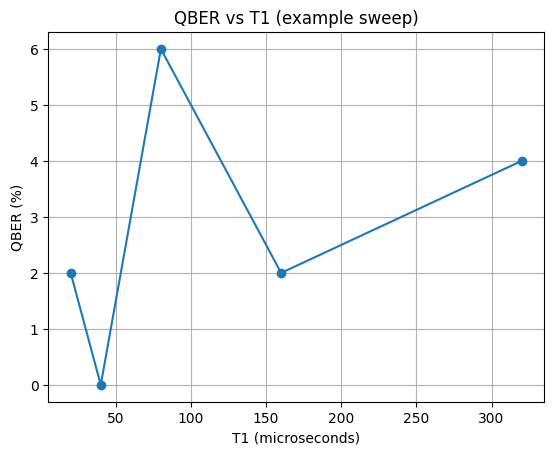

In [7]:
# e91_with_noise.py
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, amplitude_damping_error, phase_damping_error, depolarizing_error, ReadoutError

def set_hardware_params(T1=80e-6, T2=60e-6, single_gate_time=50e-9,
                        cx_gate_time=150e-9, readout_error_p=0.02,
                        depolarizing_p_single=0.001, depolarizing_p_two=0.01):
    """
    Set hardware parameters (replace these placeholders with ADS/Qiskit-Metal outputs).
      - T1: relaxation time (seconds)
      - T2: dephasing time (seconds)
      - single_gate_time: duration of single-qubit gate (seconds)
      - cx_gate_time: duration of 2-qubit gate (seconds)
      - readout_error_p: probability of bit-flip in readout
      - depolarizing_p_single: depolarizing prob for single-qubit gates
      - depolarizing_p_two: depolarizing prob for two-qubit gates
    Returns a Qiskit NoiseModel built from these parameters.
    """
    # Compute amplitude-damping and phase-damping probabilities for the gate durations
    p_relax_single = 1 - np.exp(-single_gate_time / T1)
    p_dephase_single = 1 - np.exp(-single_gate_time / T2)

    p_relax_cx = 1 - np.exp(-cx_gate_time / T1)
    p_dephase_cx = 1 - np.exp(-cx_gate_time / T2)

    # Build error objects
    amp_err_single = amplitude_damping_error(p_relax_single)
    phase_err_single = phase_damping_error(p_dephase_single)
    single_combined = amp_err_single.compose(phase_err_single)

    amp_err_cx = amplitude_damping_error(p_relax_cx)
    phase_err_cx = phase_damping_error(p_dephase_cx)
    two_q_combined_local = amp_err_cx.compose(phase_err_cx)

    # Depolarizing errors to capture gate infidelity
    depol_single = depolarizing_error(depolarizing_p_single, 1)
    depol_two = depolarizing_error(depolarizing_p_two, 2)

    # Final errors we will add to the noise model (compose relaxation+dephasing with depolarizing)
    single_error_for_model = single_combined.compose(depol_single)
    two_error_for_model = two_q_combined_local.compose(depol_two)

    # Readout error matrix
    ro_matrix = [[1 - readout_error_p, readout_error_p],
                 [readout_error_p, 1 - readout_error_p]]
    readout_err = ReadoutError(ro_matrix)

    # Assemble NoiseModel
    noise_model = NoiseModel()
    # Apply single-qubit error to typical single-qubit gates (h, x)
    noise_model.add_all_qubit_quantum_error(single_error_for_model, ['h', 'x'])
    # Apply two-qubit error to CX
    noise_model.add_all_qubit_quantum_error(two_error_for_model, ['cx'])
    # Add readout error to measurements
    noise_model.add_all_qubit_readout_error(readout_err)

    return noise_model

def run_e91(N_pairs=100, noise_model=None, seed=None):
    """
    Run the E91 entanglement-based QKD protocol simulation with given NoiseModel.
    - N_pairs: number of entangled pairs to generate
    - noise_model: instance of qiskit_aer.noise.NoiseModel or None
    - seed: seed for reproducibility (optional)
    Returns (shared_key_alice, shared_key_bob, qber, raw_data_dict)
    """
    if seed is not None:
        np.random.seed(seed)

    # Random bases: 0 -> Z basis, 1 -> X basis
    alice_bases = np.random.randint(0, 2, N_pairs)
    bob_bases = np.random.randint(0, 2, N_pairs)

    alice_results = []
    bob_results = []

    # Prepare simulator
    sim = AerSimulator(noise_model=noise_model)

    for i in range(N_pairs):
        qc = QuantumCircuit(2, 2)

        # Create Bell pair |Φ+> (Alice qubit index 0, Bob qubit index 1)
        qc.h(0)
        qc.cx(0, 1)

        # If measuring in X basis, apply H before measurement (rotates X -> Z)
        if alice_bases[i] == 1:
            qc.h(0)
        if bob_bases[i] == 1:
            qc.h(1)

        # Measure both qubits into classical bits [c0,c1]
        qc.measure([0, 1], [0, 1])

        # Transpile and run with 1 shot (each entangled pair is a single instance)
        compiled = transpile(qc, sim)
        job = sim.run(compiled, shots=1)
        result = job.result()
        counts = result.get_counts()
        outcome = list(counts.keys())[0]  # string like '00' or '11'
        # Qiskit returns bitstring with most-significant bit as qubit 0, classical register ordering depends;
        # here measurement mapping [0,1] -> [c0,c1] gives string 'b1b0' typically. To be robust, parse properly:
        # We'll read classical bits as dictionary key order: result.get_counts() key is 'c0c1' with leftmost first measured bit.
        # To avoid backend ordering ambiguity, we will access via integer conversion:
        # But for simplicity: we expect e.g. '00', '11' and use indexing as below:
        # map: outcome[0] -> measurement of qubit 0, outcome[1] -> qubit 1
        # However depending on Qiskit version ordering might be reversed; so handle both lengths.
        if len(outcome) == 2:
            bit_alice = int(outcome[0])  # qubit 0 result
            bit_bob = int(outcome[1])    # qubit 1 result
        else:
            # fallback: if ordering reversed, try reverse mapping
            bit_alice = int(outcome[-1])
            bit_bob = int(outcome[-2])

        alice_results.append(bit_alice)
        bob_results.append(bit_bob)

    alice_results = np.array(alice_results)
    bob_results = np.array(bob_results)

    # Sifting: keep only indices where basis matched
    matched_mask = alice_bases == bob_bases
    shared_key_alice = alice_results[matched_mask]
    shared_key_bob = bob_results[matched_mask]

    # Handle no-matched-case
    if len(shared_key_alice) == 0:
        qber = None
    else:
        qber = np.sum(shared_key_alice != shared_key_bob) / len(shared_key_alice)

    raw_data = {
        'alice_bases': alice_bases,
        'bob_bases': bob_bases,
        'alice_results': alice_results,
        'bob_results': bob_results,
        'matched_mask': matched_mask
    }

    return shared_key_alice, shared_key_bob, qber, raw_data

if __name__ == "__main__":
    # ---------------------------
    # Choose hardware params (replace with ADS results later)
    # ---------------------------
    # Example placeholders:
    T1 = 80e-6            # seconds
    T2 = 60e-6            # seconds
    single_gate_time = 50e-9
    cx_gate_time = 150e-9
    readout_error_p = 0.03
    depol_single = 0.002
    depol_two = 0.01

    noise = set_hardware_params(T1=T1, T2=T2,
                                single_gate_time=single_gate_time,
                                cx_gate_time=cx_gate_time,
                                readout_error_p=readout_error_p,
                                depolarizing_p_single=depol_single,
                                depolarizing_p_two=depol_two)

    # ---------------------------
    # Run E91 with noise
    # ---------------------------
    N_pairs = 200
    shared_a, shared_b, qber, raw = run_e91(N_pairs=N_pairs, noise_model=noise, seed=42)

    # ---------------------------
    # Report
    # ---------------------------
    print("\n=== E91 Simulation (Noisy) Summary ===")
    print(f"Total entangled pairs generated: {N_pairs}")
    print(f"Pairs where bases matched (key length): {len(shared_a)}")

    if len(shared_a) == 0:
        print("No matching bases found; run again with larger N_pairs.")
    else:
        print("Alice's sifted key: ", shared_a.tolist())
        print("Bob's sifted key:   ", shared_b.tolist())
        print(f"QBER = {qber * 100:.3f}%")
        thresh = 0.11
        if qber is not None and qber < thresh:
            print("Status: 🔐 Key ACCEPTED (QBER below threshold)")
        else:
            print("Status: 🚨 Key REJECTED (QBER above threshold or undefined)")

    # ---------------------------
    # Optional: quick scanning of how QBER depends on T1 (simple sweep)
    # ---------------------------
    try:
        import matplotlib.pyplot as plt
        T1_vals = np.array([20e-6, 40e-6, 80e-6, 160e-6, 320e-6])
        qbers = []
        print("\nRunning quick T1 sweep (this may take a little time)...")
        for t in T1_vals:
            nm = set_hardware_params(T1=t, T2=T2, single_gate_time=single_gate_time,
                                     cx_gate_time=cx_gate_time, readout_error_p=readout_error_p,
                                     depolarizing_p_single=depol_single, depolarizing_p_two=depol_two)
            _, _, q, _ = run_e91(N_pairs=100, noise_model=nm, seed=42)
            qbers.append(0.0 if q is None else q)
        plt.plot(T1_vals * 1e6, np.array(qbers) * 100, marker='o')
        plt.xlabel("T1 (microseconds)")
        plt.ylabel("QBER (%)")
        plt.title("QBER vs T1 (example sweep)")
        plt.grid(True)
        plt.show()
    except Exception:
        # matplotlib not available or display not supported
        pass


In [8]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

# ---------------------------
# PARAMETERS
# ---------------------------

N = 50
use_noise = True
eve_enabled = True    # <---- Turn Eve ON/OFF

noise_strength = 0.02

# ---------------------------
# NOISE MODEL SETUP
# ---------------------------

noise_model = NoiseModel()
if use_noise:
    noise_model.add_all_qubit_quantum_error(depolarizing_error(noise_strength, 1), ['measure'])
    noise_model.add_all_qubit_quantum_error(depolarizing_error(noise_strength, 2), ['cx'])

# ---------------------------
# RANDOM BASES FOR ALICE, BOB & EVE
# ---------------------------

alice_bases = np.random.randint(0, 2, N)
bob_bases = np.random.randint(0, 2, N)
eve_bases = np.random.randint(0, 2, N) if eve_enabled else None

alice_results = []
bob_results = []

# ---------------------------
# E91 + EAVESDROPPER LOOP
# ---------------------------

for i in range(N):

    qc = QuantumCircuit(2, 2)

    # Create entanglement pair
    qc.h(0)
    qc.cx(0, 1)

    # ----------------------
    # Eve Intercepts Qubit
    # ----------------------
    if eve_enabled:
        if eve_bases[i] == 1:
            qc.h(1)   # Eve chooses basis

        qc.measure(1, 1)     # Eve measures Bob's qubit
        qc.reset(1)          # Qubit collapses & loses entanglement

        if eve_bases[i] == 1:
            qc.h(1)          # Eve attempts to resend in same basis

    # ----------------------
    # Alice & Bob's Measurement
    # ----------------------
    if alice_bases[i] == 1:
        qc.h(0)

    if bob_bases[i] == 1:
        qc.h(1)

    qc.measure([0,1], [0,1])

    # ----------------------
    # SIMULATION
    # ----------------------

    sim = AerSimulator(noise_model=noise_model if use_noise else None)
    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1).result()

    outcome = list(result.get_counts().keys())[0]

    alice_results.append(int(outcome[-1]))  # classical bit 0
    bob_results.append(int(outcome[-2]))    # classical bit 1


# ---------------------------
# SIFTING STEP (Keep only matched bases)
# ---------------------------

matched = alice_bases == bob_bases

shared_key_alice = np.array(alice_results)[matched]
shared_key_bob = np.array(bob_results)[matched]

# ---------------------------
# QBER CALCULATION
# ---------------------------

qber = np.sum(shared_key_alice != shared_key_bob) / len(shared_key_alice)  # fraction

qber_percent = qber * 100.0
print("\nQBER:", round(qber_percent, 2), "%")

# Compare fraction against 0.11 (11%)
if qber < 0.11:
    print("\nStatus: 🔐 Key is secure — no eavesdropper detected.\n")
else:
    print("\nStatus: 🚨 Possible eavesdropper detected — key rejected.\n")



QBER: 51.85 %

Status: 🚨 Possible eavesdropper detected — key rejected.



In [9]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error

# ------------------------------
# USER SETTINGS
# ------------------------------
N = 50                          # number of entanglement pairs
EVE_ACTIVE = True               # toggle eavesdropper
noise_strength = 0.02           # optional physical noise

# ------------------------------
# NOISE MODEL (optional)
# ------------------------------
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(noise_strength, 1), ['measure'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(noise_strength, 2), ['cx'])

sim = AerSimulator(noise_model=noise_model)

# ------------------------------
# RANDOM BASES FOR ALICE & BOB
# basis: 0 = Z basis, 1 = X basis
# ------------------------------
alice_bases = np.random.randint(0, 2, N)
bob_bases   = np.random.randint(0, 2, N)

alice_results = []
bob_results = []

# ------------------------------
# E91 PROTOCOL SIMULATION
# ------------------------------
for i in range(N):

    # --- 1️⃣ Create Bell pair ---
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)

    # --- 2️⃣ Eve intercepts Bob's qubit (if active) ---
    if EVE_ACTIVE:
        eve_basis = np.random.randint(0, 2)  # Eve randomly selects a basis

        if eve_basis == 1:
            qc.h(1)

        qc.measure(1, 1)  # measure onto classical bit 1

        compiled = transpile(qc, sim)
        result = sim.run(compiled, shots=1).result()
        eve_measurement = int(list(result.get_counts().keys())[0][-2])  # outcome of qubit 1

        # reset and re-prepare Bob's qubit based on Eve's observation
        qc.reset(1)

        if eve_measurement == 1:
            qc.x(1)

        if eve_basis == 1:
            qc.h(1)

    # --- 3️⃣ Alice & Bob measure in their bases ---
    if alice_bases[i] == 1:
        qc.h(0)
    if bob_bases[i] == 1:
        qc.h(1)

    qc.measure([0,1], [0,1])

    compiled = transpile(qc, sim)
    outcome = list(sim.run(compiled, shots=1).result().get_counts().keys())[0]
    
    alice_results.append(int(outcome[-1]))   # left bit
    bob_results.append(int(outcome[-2]))     # right bit

# ------------------------------
# KEY SIFTING (keep only matching bases)
# ------------------------------
matched = alice_bases == bob_bases
shared_key_alice = np.array(alice_results)[matched]
shared_key_bob   = np.array(bob_results)[matched]

# ------------------------------
# QBER CALCULATION
# ------------------------------
qber = np.sum(shared_key_alice != shared_key_bob) / len(shared_key_alice)
qber_percent = round(qber * 100, 2)

# ------------------------------
# OUTPUT RESULTS
# ------------------------------
print("\n--- 🔐 E91 Quantum Key Distribution ---")
print("Eavesdropper:", "ACTIVE" if EVE_ACTIVE else "INACTIVE")
print(f"Raw Key Length: {len(shared_key_alice)} bits\n")

print("Final Shared Key (Alice):", shared_key_alice)
print("Final Shared Key (Bob):  ", shared_key_bob)

print(f"\nQBER: {qber_percent}%")

# --- ⭐ Security decision based on QKD theory ---
if qber < 0.11:
    print("\nStatus: ✔ Key is secure — no eavesdropper detected.\n")
else:
    print("\nStatus: ❌ Possible eavesdropper detected — key rejected.\n")



--- 🔐 E91 Quantum Key Distribution ---
Eavesdropper: ACTIVE
Raw Key Length: 18 bits

Final Shared Key (Alice): [0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1]
Final Shared Key (Bob):   [0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0]

QBER: 38.89%

Status: ❌ Possible eavesdropper detected — key rejected.



In [10]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile

# --------------------------- PARAMETERS ---------------------------

num_bits = 50
alice_bits = np.random.randint(0, 2, num_bits)
alice_bases = np.random.randint(0, 2, num_bits)
bob_bases   = np.random.randint(0, 2, num_bits)
eve_bases   = np.random.randint(0, 2, num_bits)

enable_eve = True   # Turn OFF to test normal BB84

sim = AerSimulator()

bob_results = []

# --------------------------- BB84 PROCESS ---------------------------

for i in range(num_bits):

    qc = QuantumCircuit(1,1)

    # Alice prepares qubit
    if alice_bits[i] == 1:
        qc.x(0)
    if alice_bases[i] == 1:
        qc.h(0)

    # ------------------ Eve Intercept-Resend ------------------
    if enable_eve:
        qc_copy = qc.copy()

        if eve_bases[i] == 1:
            qc_copy.h(0)

        qc_copy.measure(0,0)
        compiled = transpile(qc_copy, sim)
        eve_result = sim.run(compiled, shots=1).result().get_counts()
        eve_bit = int(list(eve_result.keys())[0])

        # Eve resends qubit
        qc = QuantumCircuit(1,1)
        if eve_bit == 1:
            qc.x(0)
        if eve_bases[i] == 1:
            qc.h(0)

    # Bob measures
    if bob_bases[i] == 1:
        qc.h(0)
    qc.measure(0,0)

    compiled = transpile(qc, sim)
    result = sim.run(compiled, shots=1).result().get_counts()
    bob_bit = int(list(result.keys())[0])
    bob_results.append(bob_bit)

# ------------------- KEY SIFTING -------------------

matching = [i for i in range(num_bits) if alice_bases[i] == bob_bases[i]]
final_key_alice = [alice_bits[i] for i in matching]
final_key_bob   = [bob_results[i] for i in matching]

# ------------------- QBER -------------------

errors = sum(a != b for a, b in zip(final_key_alice, final_key_bob))
qber = errors / len(final_key_alice) * 100

# ------------------- OUTPUT -------------------

print("\n===== BB84 Simulation Result =====")
print("Eavesdropping:", "ON" if enable_eve else "OFF")
print("Raw Bits:", num_bits)
print("Shared Key Length:", len(final_key_alice))

print("\nAlice key:", final_key_alice)
print("Bob key:  ", final_key_bob)

print(f"\nQBER: {qber:.2f} %")

if qber > 11:
    print("\n⚠ ALERT: Possible eavesdropping detected!")
else:
    print("\n✔ Secure channel — no attack detected.")



===== BB84 Simulation Result =====
Eavesdropping: ON
Raw Bits: 50
Shared Key Length: 26

Alice key: [np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1)]
Bob key:   [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]

QBER: 7.69 %

✔ Secure channel — no attack detected.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# ------------------------------------------
# Experiment Settings
# ------------------------------------------
NUM_BITS = 200
attack_probabilities = np.arange(0, 1.05, 0.1)  # 0 to 1 in steps of 0.1

sim = AerSimulator()
qber_results = []

# ------------------------------------------
# Helper: Run BB84 experiment for given attack strength
# ------------------------------------------
def run_bb84(attack_strength):
    alice_bits = np.random.randint(0, 2, NUM_BITS)
    alice_bases = np.random.randint(0, 2, NUM_BITS)
    bob_bases   = np.random.randint(0, 2, NUM_BITS)
    eve_bases   = np.random.randint(0, 2, NUM_BITS)

    bob_results = []

    for i in range(NUM_BITS):

        qc = QuantumCircuit(1,1)

        # Alice prepares qubit
        if alice_bits[i] == 1:
            qc.x(0)
        if alice_bases[i] == 1:
            qc.h(0)

        # --- Eve intercepts only with probability attack_strength ---
        if np.random.rand() < attack_strength:
            qc_copy = qc.copy()

            if eve_bases[i] == 1:
                qc_copy.h(0)

            qc_copy.measure(0,0)

            compiled = transpile(qc_copy, sim)
            eve_result = sim.run(compiled, shots=1).result().get_counts()
            eve_bit = int(list(eve_result.keys())[0])

            # Eve resends
            qc = QuantumCircuit(1,1)
            if eve_bit == 1:
                qc.x(0)
            if eve_bases[i] == 1:
                qc.h(0)

        # Bob measures
        if bob_bases[i] == 1:
            qc.h(0)
        qc.measure(0,0)

        compiled = transpile(qc, sim)
        result = sim.run(compiled, shots=1).result().get_counts()
        bob_bit = int(list(result.keys())[0])
        bob_results.append(bob_bit)

    # Key Sifting (keep only matching bases)
    matches = alice_bases == bob_bases
    alice_key = np.array(alice_bits)[matches]
    bob_key   = np.array(bob_results)[matches]

    # QBER Calculation
    errors = sum(a != b for a, b in zip(alice_key, bob_key))
    return (errors / len(alice_key)) * 100


# ------------------------------------------
# Run simulation for different attack levels
# ------------------------------------------
for p in attack_probabilities:
    qber = run_bb84(p)
    qber_results.append(qber)
    print(f"Attack Strength: {int(p*100)}% --> QBER: {qber:.2f}%")

# ------------------------------------------
# PLOT
# ------------------------------------------
plt.plot(attack_probabilities * 100, qber_results, marker="o")
plt.xlabel("Eavesdropping Probability (%)")
plt.ylabel("QBER (%)")
plt.title("QBER vs Eavesdropper Attack Strength (BB84 Protocol)")
plt.grid(True)
plt.show()


Attack Strength: 0% --> QBER: 0.00%
Attack Strength: 10% --> QBER: 1.89%
Attack Strength: 20% --> QBER: 6.45%
Attack Strength: 30% --> QBER: 7.27%
Attack Strength: 40% --> QBER: 12.50%
Attack Strength: 50% --> QBER: 6.32%
Attack Strength: 60% --> QBER: 19.59%


In [ ]:
# compare_bb84_vs_e91.py
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# -----------------------------
# Simulation settings
# -----------------------------
NUM_BITS = 300            # number of qubits / pairs per trial
attack_probs = np.linspace(0.0, 1.0, 11)   # 0%,10%,...,100%
TRIALS_PER_POINT = 6      # average over multiple trials to reduce variance
sim = AerSimulator()

# -----------------------------
# Helper: run one BB84 experiment and return QBER (%)
# -----------------------------
def run_bb84_trial(attack_prob):
    alice_bits = np.random.randint(0, 2, NUM_BITS)
    alice_bases = np.random.randint(0, 2, NUM_BITS)
    bob_bases = np.random.randint(0, 2, NUM_BITS)
    eve_bases = np.random.randint(0, 2, NUM_BITS)

    bob_results = []

    for i in range(NUM_BITS):
        # Alice prepares a single qubit
        qc = QuantumCircuit(1, 1)
        if alice_bits[i] == 1:
            qc.x(0)
        if alice_bases[i] == 1:
            qc.h(0)

        # Eve intercepts with probability attack_prob
        if np.random.rand() < attack_prob:
            # Eve measures in her chosen basis
            qc_e = qc.copy()
            if eve_bases[i] == 1:
                qc_e.h(0)
            qc_e.measure(0, 0)
            eve_counts = sim.run(transpile(qc_e, sim), shots=1).result().get_counts()
            eve_bit = int(list(eve_counts.keys())[0])

            # Eve resends a qubit prepared in her measured state (in her basis)
            qc = QuantumCircuit(1, 1)
            if eve_bit == 1:
                qc.x(0)
            if eve_bases[i] == 1:
                qc.h(0)

        # Bob measures in his basis
        if bob_bases[i] == 1:
            qc.h(0)
        qc.measure(0, 0)
        counts = sim.run(transpile(qc, sim), shots=1).result().get_counts()
        bob_bit = int(list(counts.keys())[0])
        bob_results.append(bob_bit)

    # Sift keys (keep only positions where bases match)
    matched = alice_bases == bob_bases
    if np.sum(matched) == 0:
        return 0.0  # no matched bits - edge case
    alice_key = np.array(alice_bits)[matched]
    bob_key = np.array(bob_results)[matched]

    errors = np.sum(alice_key != bob_key)
    qber_percent = (errors / len(alice_key)) * 100.0
    return qber_percent

# -----------------------------
# Helper: run one E91 trial and return QBER (%)
# -----------------------------
def run_e91_trial(attack_prob):
    alice_bases = np.random.randint(0, 2, NUM_BITS)
    bob_bases = np.random.randint(0, 2, NUM_BITS)
    eve_bases = np.random.randint(0, 2, NUM_BITS)

    alice_results = []
    bob_results = []

    for i in range(NUM_BITS):
        # Step A: create Bell pair (we will potentially let Eve intercept Bob's qubit)
        qc_bell = QuantumCircuit(2, 2)
        qc_bell.h(0)
        qc_bell.cx(0, 1)

        # Eve intercepts Bob's qubit with probability attack_prob
        if np.random.rand() < attack_prob:
            # measure Bob's qubit in Eve basis (two-step approach)
            qc_e = qc_bell.copy()
            if eve_bases[i] == 1:
                qc_e.h(1)
            qc_e.measure(1, 1)
            res_e = sim.run(transpile(qc_e, sim), shots=1).result().get_counts()
            eve_outcome = int(list(res_e.keys())[0][-2])  # qubit1 outcome

            # Eve re-prepares Bob's qubit according to her measurement (resend)
            qc_send = QuantumCircuit(2, 2)
            # Keep Alice's qubit as-is; reset and prepare Bob's qubit
            if eve_outcome == 1:
                qc_send.x(1)
            if eve_bases[i] == 1:
                qc_send.h(1)

            # To preserve Alice's qubit state, create circuit where qubit 0 is the original
            # We simulate by preparing a fresh Bell-like structure where Alice's qubit is re-prepared:
            # Simpler: measure Alice's qubit now later from the original entangled qc_bell state
            # For practical simulation, we proceed with qc_send treating Alice unaffected
            # We'll measure Alice from qc_bell and Bob from qc_send separately below.
            # So do two small simulations:
            # - Measure Alice's qubit (from qc_bell)
            # - Use qc_send to represent Bob's received qubit after Eve's resend
            # Measure Alice:
            qc_a = qc_bell.copy()
            qc_a.measure(0, 0)
            res_a = sim.run(transpile(qc_a, sim), shots=1).result().get_counts()
            alice_bit = int(list(res_a.keys())[0][-1])
            # Measure Bob (resend)
            # apply Bob's measurement basis later
            # qc_send currently has Bob prepared state; measure later with basis
            # For simplicity, append Alice & Bob recorded values now and then apply Bob basis rotation afterwards.
            # But we want to allow random bob basis -> so we'll instead do full circuits below:
            # We simulate as: Alice's bit is alice_bit; Bob's qubit will be measured from qc_send with bob basis
            # Build Bob circuit:
            qc_bob = qc_send.copy()
            if bob_bases[i] == 1:
                qc_bob.h(1)
            qc_bob.measure(1, 1)
            res_b = sim.run(transpile(qc_bob, sim), shots=1).result().get_counts()
            bob_bit = int(list(res_b.keys())[0][-2])
            alice_results.append(alice_bit)
            bob_results.append(bob_bit)
            continue  # next pair

        # If Eve does NOT intercept, we simulate normal entangled pair measurement
        # Apply measurement bases (H if X basis), then measure both qubits
        qc = qc_bell.copy()
        if alice_bases[i] == 1:
            qc.h(0)
        if bob_bases[i] == 1:
            qc.h(1)
        qc.measure([0,1], [0,1])
        res = sim.run(transpile(qc, sim), shots=1).result().get_counts()
        outcome = list(res.keys())[0]
        # outcome is string 'b1b0' with qubit1 as left char - we map appropriately
        alice_bit = int(outcome[-1])
        bob_bit = int(outcome[-2])
        alice_results.append(alice_bit)
        bob_results.append(bob_bit)

    # Sift: keep only events where bases matched
    matched = alice_bases == bob_bases
    if np.sum(matched) == 0:
        return 0.0
    alice_key = np.array(alice_results)[matched]
    bob_key = np.array(bob_results)[matched]
    errors = np.sum(alice_key != bob_key)
    qber_percent = (errors / len(alice_key)) * 100.0
    return qber_percent

# -----------------------------
# Run experiments and average
# -----------------------------
bb84_qbers = []
e91_qbers = []

for p in attack_probs:
    bb84_vals = []
    e91_vals = []
    for t in range(TRIALS_PER_POINT):
        bb84_vals.append(run_bb84_trial(p))
        e91_vals.append(run_e91_trial(p))
    bb84_qbers.append(np.mean(bb84_vals))
    e91_qbers.append(np.mean(e91_vals))
    print(f"p={p:.2f} -> BB84 QBER={bb84_qbers[-1]:.2f}%, E91 QBER={e91_qbers[-1]:.2f}%")

# -----------------------------
# Plot comparison
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(attack_probs*100, bb84_qbers, marker='o', label='BB84 (Intercept-Resend)')
plt.plot(attack_probs*100, e91_qbers, marker='s', label='E91 (Entanglement + Intercept-Resend)')
plt.xlabel('Eavesdrop Probability (%)')
plt.ylabel('QBER (%)')
plt.title('BB84 vs E91: QBER vs Eavesdrop Probability (Intercept-Resend Attack)')
plt.grid(True)
plt.legend()
plt.ylim(0, 100)
plt.show()


p=0.00 -> BB84 QBER=0.00%, E91 QBER=0.00%
p=0.10 -> BB84 QBER=1.80%, E91 QBER=5.13%
p=0.20 -> BB84 QBER=5.16%, E91 QBER=8.33%
p=0.30 -> BB84 QBER=7.95%, E91 QBER=14.27%
p=0.40 -> BB84 QBER=12.15%, E91 QBER=23.23%
p=0.50 -> BB84 QBER=14.21%, E91 QBER=25.32%
p=0.60 -> BB84 QBER=13.59%, E91 QBER=32.26%
p=0.70 -> BB84 QBER=15.92%, E91 QBER=35.87%


KeyboardInterrupt: 

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error, ReadoutError

# ===========================================
#  YOUR HARDWARE PARAMETERS FROM ADS
# ===========================================

T1 = 2.97e-6                    # seconds (ADS)
gate_time = 30e-9              # assumed control pulse duration 30ns
gate_fidelity = 0.996867       # from Gaussian pulse simulation
leakage_prob = 1.58e-05        # optional, not deeply used yet

# Derived noise values
depolarizing_prob = 1 - gate_fidelity                  # gate noise
amp_damping_prob = 1 - np.exp(-gate_time / T1)         # T1 noise
readout_error_prob = 0.01                               # assumed for now

# ===========================================
#  BUILD NOISE MODEL
# ===========================================
noise_model = NoiseModel()

# Add depolarizing noise for single qubit operations
noise_model.add_all_qubit_quantum_error(depolarizing_error(depolarizing_prob, 1), ["x", "h"])

# Add amplitude damping noise (T1-based)
noise_model.add_all_qubit_quantum_error(amplitude_damping_error(amp_damping_prob), ["id", "x", "h"])

# Readout error matrix: P(correct)=0.99, P(error)=0.01
readout_error = ReadoutError([[1 - readout_error_prob, readout_error_prob],
                              [readout_error_prob, 1 - readout_error_prob]])
noise_model.add_all_qubit_readout_error(readout_error)

# ===========================================
#  BB84 PARAMETERS
# ===========================================
num_bits = 50
enable_eve = True

alice_bits = np.random.randint(0, 2, num_bits)
alice_bases = np.random.randint(0, 2, num_bits)
bob_bases   = np.random.randint(0, 2, num_bits)
eve_bases   = np.random.randint(0, 2, num_bits)

sim = AerSimulator(noise_model=noise_model)
bob_results = []

# ===========================================
#  BB84 PROCESS
# ===========================================
for i in range(num_bits):

    qc = QuantumCircuit(1,1)

    # Alice prepares     
    if alice_bits[i] == 1:
        qc.x(0)
    if alice_bases[i] == 1:
        qc.h(0)

    # --------------------------- Eve Intercept ---------------------------
    if enable_eve:
        qc_eve = qc.copy()

        if eve_bases[i] == 1:
            qc_eve.h(0)

        qc_eve.measure(0,0)
        result = sim.run(transpile(qc_eve, sim), shots=1).result().get_counts()
        eve_measured = int(list(result.keys())[0])

        # Eve resends qubit
        qc = QuantumCircuit(1,1)
        if eve_measured == 1:
            qc.x(0)
        if eve_bases[i] == 1:
            qc.h(0)

    # Bob measurement
    if bob_bases[i] == 1:
        qc.h(0)

    qc.measure(0,0)
    result = sim.run(transpile(qc, sim), shots=1).result().get_counts()
    bob_results.append(int(list(result.keys())[0]))

# ===========================================
#  KEY SIFTING & QBER
# ===========================================
matching = [i for i in range(num_bits) if alice_bases[i] == bob_bases[i]]
final_key_alice = [alice_bits[i] for i in matching]
final_key_bob   = [bob_results[i] for i in matching]

errors = sum(a != b for a, b in zip(final_key_alice, final_key_bob))
qber = errors / len(final_key_alice) * 100

# ===========================================
#  OUTPUT
# ===========================================
print("\n===== BB84 Simulation with Hardware Noise =====")
print("Eavesdropping:", "ON" if enable_eve else "OFF")
print("Shared Key Length:", len(final_key_alice))
print("Alice Key:", final_key_alice)
print("Bob Key:  ", final_key_bob)
print(f"\nQBER: {qber:.2f} %")

if qber > 11:
    print("\n⚠ ALERT: Possible eavesdropping detected!")
else:
    print("\n✔ Secure channel — parameters within tolerance.")



===== BB84 Simulation with Hardware Noise =====
Eavesdropping: ON
Shared Key Length: 27
Alice Key: [np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1)]
Bob Key:   [1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]

QBER: 37.04 %

⚠ ALERT: Possible eavesdropping detected!


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error, ReadoutError

# ===========================================
#  YOUR HARDWARE PARAMETERS FROM ADS
# ===========================================
T1 = 2.97e-6
gate_time = 30e-9
gate_fidelity = 0.996867

# Derived error probabilities
depolarizing_prob = 1 - gate_fidelity
amp_damping_prob = 1 - np.exp(-gate_time / T1)
readout_error_prob = 0.01

# ===========================================
#  BUILD NOISE MODEL
# ===========================================
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(depolarizing_prob, 1),
                                        ["x", "h"])
noise_model.add_all_qubit_quantum_error(amplitude_damping_error(amp_damping_prob),
                                        ["id", "x", "h"])

readout_error = ReadoutError([[1 - readout_error_prob, readout_error_prob],
                              [readout_error_prob, 1 - readout_error_prob]])
noise_model.add_all_qubit_readout_error(readout_error)

# ===========================================
#  BB84 PARAMETERS
# ===========================================
num_bits = 50
alice_bits  = np.random.randint(0, 2, num_bits)
alice_bases = np.random.randint(0, 2, num_bits)
bob_bases   = np.random.randint(0, 2, num_bits)

sim = AerSimulator(noise_model=noise_model)
bob_results = []

# ===========================================
#  BB84 PROCESS (NO EAVESDROPPER)
# ===========================================
for i in range(num_bits):

    qc = QuantumCircuit(1,1)

    # Alice prepares qubit
    if alice_bits[i] == 1:
        qc.x(0)
    if alice_bases[i] == 1:
        qc.h(0)

    # Bob measures in his basis
    if bob_bases[i] == 1:
        qc.h(0)

    qc.measure(0,0)
    result = sim.run(transpile(qc, sim), shots=1).result().get_counts()
    bob_results.append(int(list(result.keys())[0]))

# ===========================================
#  SIFTING & QBER
# ===========================================
matching = [i for i in range(num_bits) if alice_bases[i] == bob_bases[i]]
final_alice = [int(alice_bits[i]) for i in matching]
final_bob   = [int(bob_results[i]) for i in matching]

errors = sum(a != b for a, b in zip(final_alice, final_bob))
qber = (errors / len(final_alice)) * 100

# ===========================================
#  BEAUTIFUL E91-STYLE OUTPUT
# ===========================================
print("\n===== 🔐 BB84 Quantum Key Distribution Simulation =====")
print("Eavesdropping: INACTIVE\n")

print("Final Shared Key (Alice):", final_alice)
print("Final Shared Key (Bob):  ", final_bob)

print(f"\nQBER: {qber:.2f}%")

if qber > 11:
    print("⚠ High QBER — Channel noisy (risk of eavesdropping). Key rejected.")
else:
    print("✔ Secure channel — QBER within limits. Key accepted.")



===== 🔐 BB84 Quantum Key Distribution Simulation =====
Eavesdropping: INACTIVE

Final Shared Key (Alice): [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1]
Final Shared Key (Bob):   [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1]

QBER: 3.45%
✔ Secure channel — QBER within limits. Key accepted.


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error, amplitude_damping_error, ReadoutError

# ===========================================
#  YOUR HARDWARE PARAMETERS FROM ADS
# ===========================================
T1 = 2.97e-6                    # seconds (ADS)
gate_time = 30e-9              # 30 ns pulse
gate_fidelity = 0.996867       # from Gaussian pulse simulation

# Derived noise values
depolarizing_prob = 1 - gate_fidelity
amp_damping_prob = 1 - np.exp(-gate_time / T1)
readout_error_prob = 0.01

# ===========================================
#  BUILD NOISE MODEL
# ===========================================
noise_model = NoiseModel()

# Single-qubit gate noise (X, H)
noise_model.add_all_qubit_quantum_error(depolarizing_error(depolarizing_prob, 1),
                                        ["x", "h"])

# T1 relaxation noise
noise_model.add_all_qubit_quantum_error(amplitude_damping_error(amp_damping_prob),
                                        ["id", "x", "h"])

# Readout error
readout_error = ReadoutError([[1 - readout_error_prob, readout_error_prob],
                              [readout_error_prob, 1 - readout_error_prob]])
noise_model.add_all_qubit_readout_error(readout_error)

# ===========================================
#  BB84 PARAMETERS — NO EAVESDROPPER
# ===========================================
num_bits = 50

alice_bits = np.random.randint(0, 2, num_bits)
alice_bases = np.random.randint(0, 2, num_bits)
bob_bases   = np.random.randint(0, 2, num_bits)

sim = AerSimulator(noise_model=noise_model)
bob_results = []

# ===========================================
#  BB84 PROCESS (NO EVE)
# ===========================================
for i in range(num_bits):

    qc = QuantumCircuit(1,1)

    # --- Alice prepares the qubit ---
    if alice_bits[i] == 1:
        qc.x(0)
    if alice_bases[i] == 1:
        qc.h(0)

    # --- Bob chooses basis ---
    if bob_bases[i] == 1:
        qc.h(0)

    qc.measure(0,0)

    result = sim.run(transpile(qc, sim), shots=1).result().get_counts()
    bob_results.append(int(list(result.keys())[0]))

# ===========================================
#  KEY SIFTING & QBER
# ===========================================
matching = [i for i in range(num_bits) if alice_bases[i] == bob_bases[i]]
final_key_alice = [alice_bits[i] for i in matching]
final_key_bob   = [bob_results[i] for i in matching]

errors = sum(a != b for a, b in zip(final_key_alice, final_key_bob))
qber = errors / len(final_key_alice) * 100

# ===========================================
#  OUTPUT
# ===========================================
print("\n===== BB84 Simulation with ADS Hardware Noise =====")
print("Eavesdropping: OFF")
print("Shared Key Length:", len(final_key_alice))
print("Alice Key:", final_key_alice)
print("Bob Key:  ", final_key_bob)
print(f"\nQBER: {qber:.2f} %")

if qber > 11:
    print("\n⚠ High QBER — channel too noisy!")
else:
    print("\n✔ Secure channel — within QKD tolerance.")



===== BB84 Simulation with ADS Hardware Noise =====
Eavesdropping: OFF
Shared Key Length: 28
Alice Key: [np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(1), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(0), np.int32(0), np.int32(1), np.int32(1), np.int32(0), np.int32(0)]
Bob Key:   [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0]

QBER: 0.00 %

✔ Secure channel — within QKD tolerance.


## Explanation

- A Hadamard gate is applied to create superposition.
- The qubit is measured over 1000 shots.
- The output distribution validates probabilistic quantum behavior.
